<a href="https://colab.research.google.com/github/adnds/-Construindo_ArquiteturasAzure/blob/main/Projeto_Final_do_Bootcamp_C_DIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Configuração de estilo
plt.style.use('default')
sns.set_palette("viridis")

In [2]:
# Carregar os dados
df = pd.read_csv('bootcamp_test.csv')

# Informações básicas do dataset
print("Dimensões do dataset:", df.shape)
print("\nPrimeiras 5 linhas:")
print(df.head())
print("\nInformações do dataset:")
print(df.info())
print("\nEstatísticas descritivas:")
print(df.describe())
print("\nValores únicos por coluna:")
print(df.nunique())

Dimensões do dataset: (7173, 9)

Primeiras 5 linhas:
      id id_produto tipo  temperatura_ar  temperatura_processo  \
0  35260     L53432    L           300.8                 310.3   
1  35261     M19544    M           303.6                 311.8   
2  35262     M16591    M           298.3                 307.9   
3  35263     L51922    L           303.3                 311.3   
4  35264     L51701    L           302.4                 310.4   

   umidade_relativa  velocidade_rotacional  torque  desgaste_da_ferramenta  
0              90.0                   1538    36.1                     198  
1              90.0                   1421    44.8                     101  
2              90.0                   1485    42.0                     117  
3              90.0                   1592    33.7                      14  
4              90.0                   1865    23.9                     129  

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173 entries,

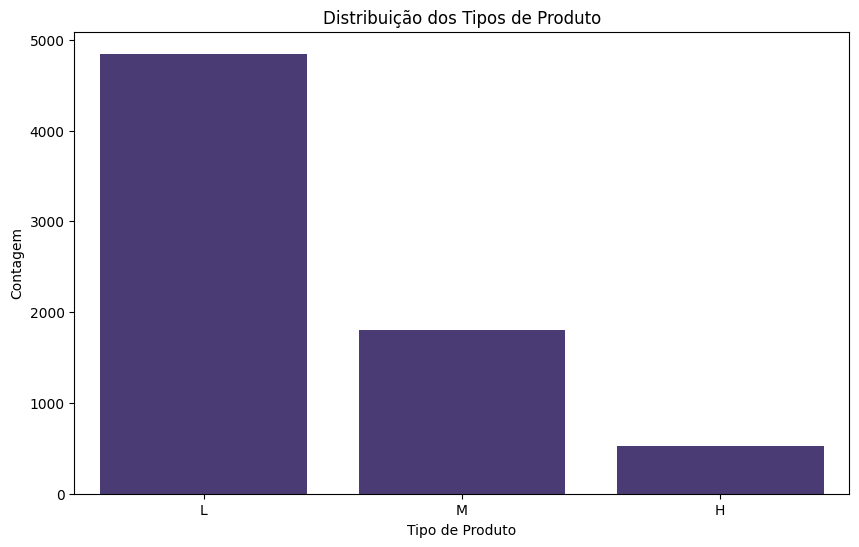

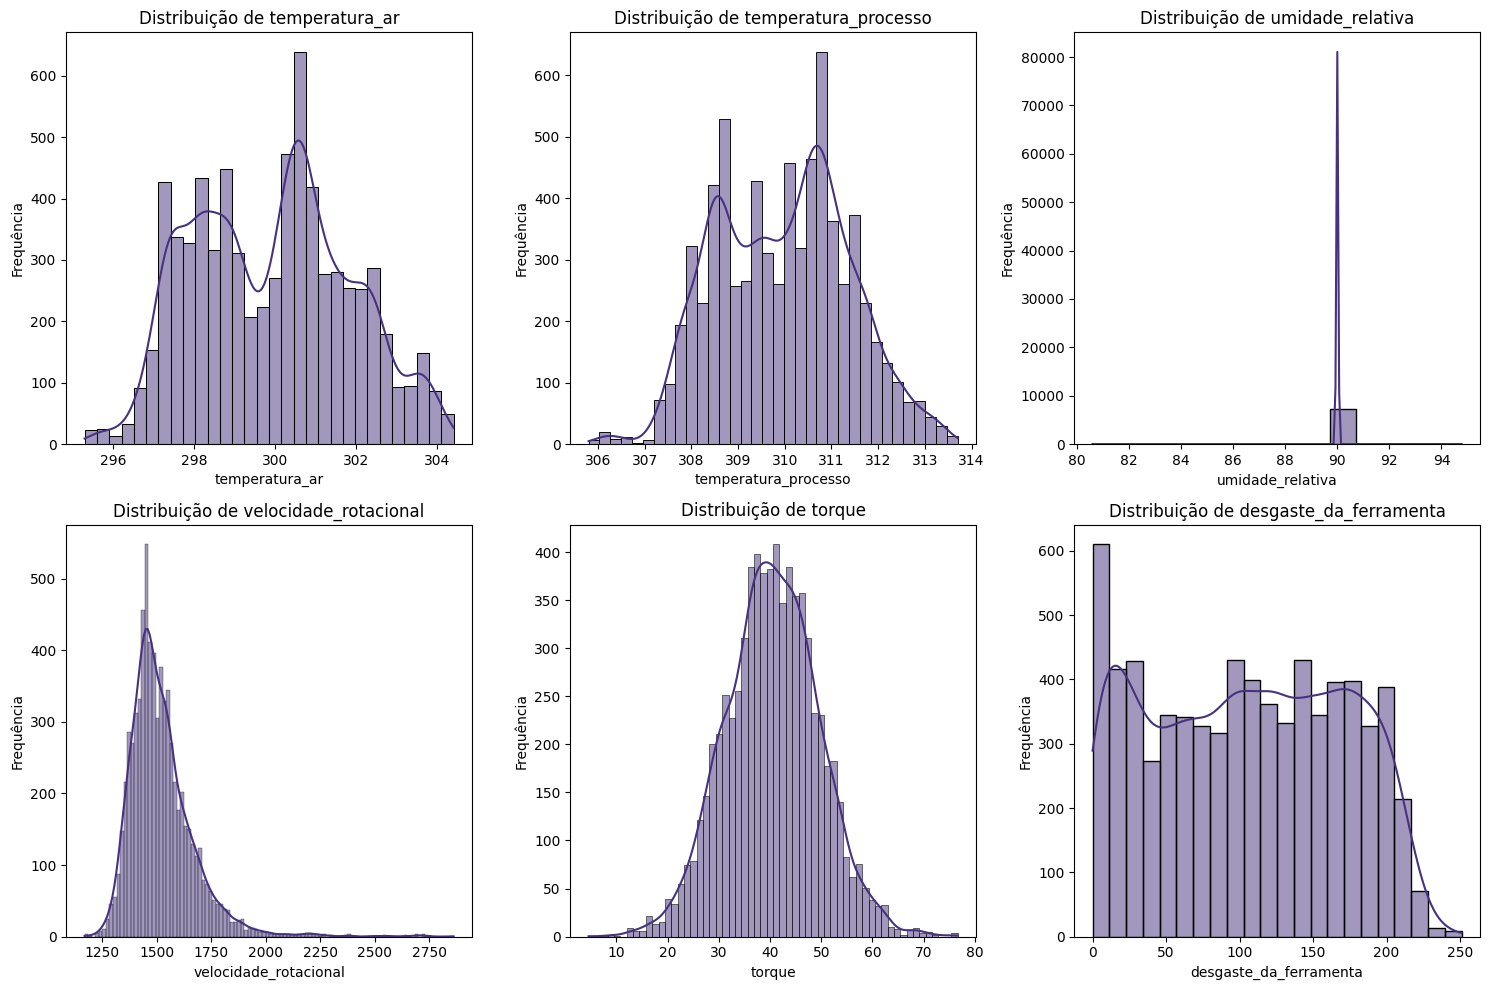

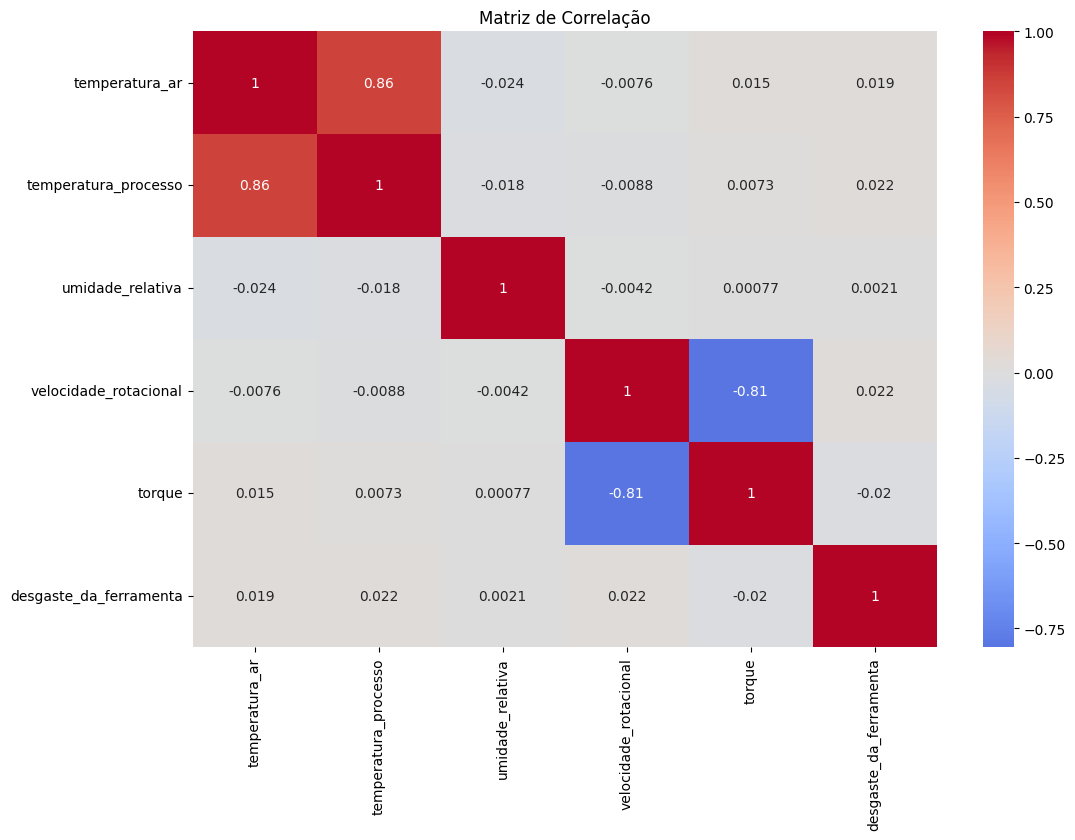

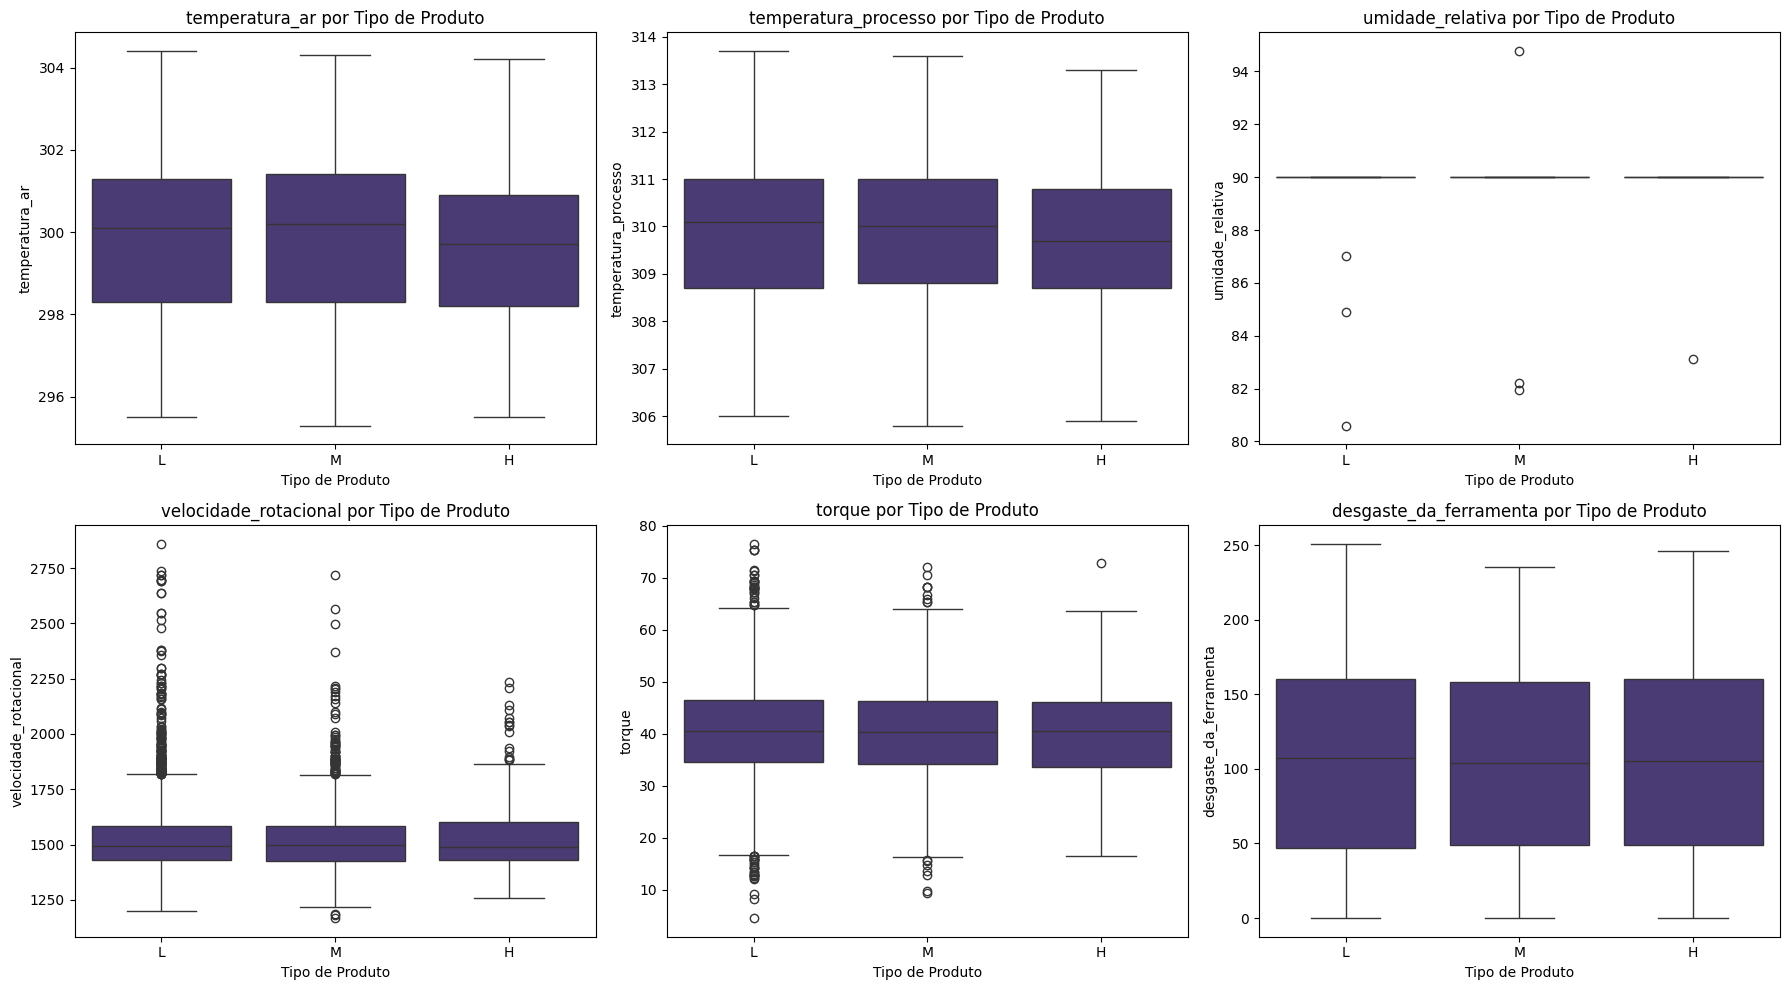

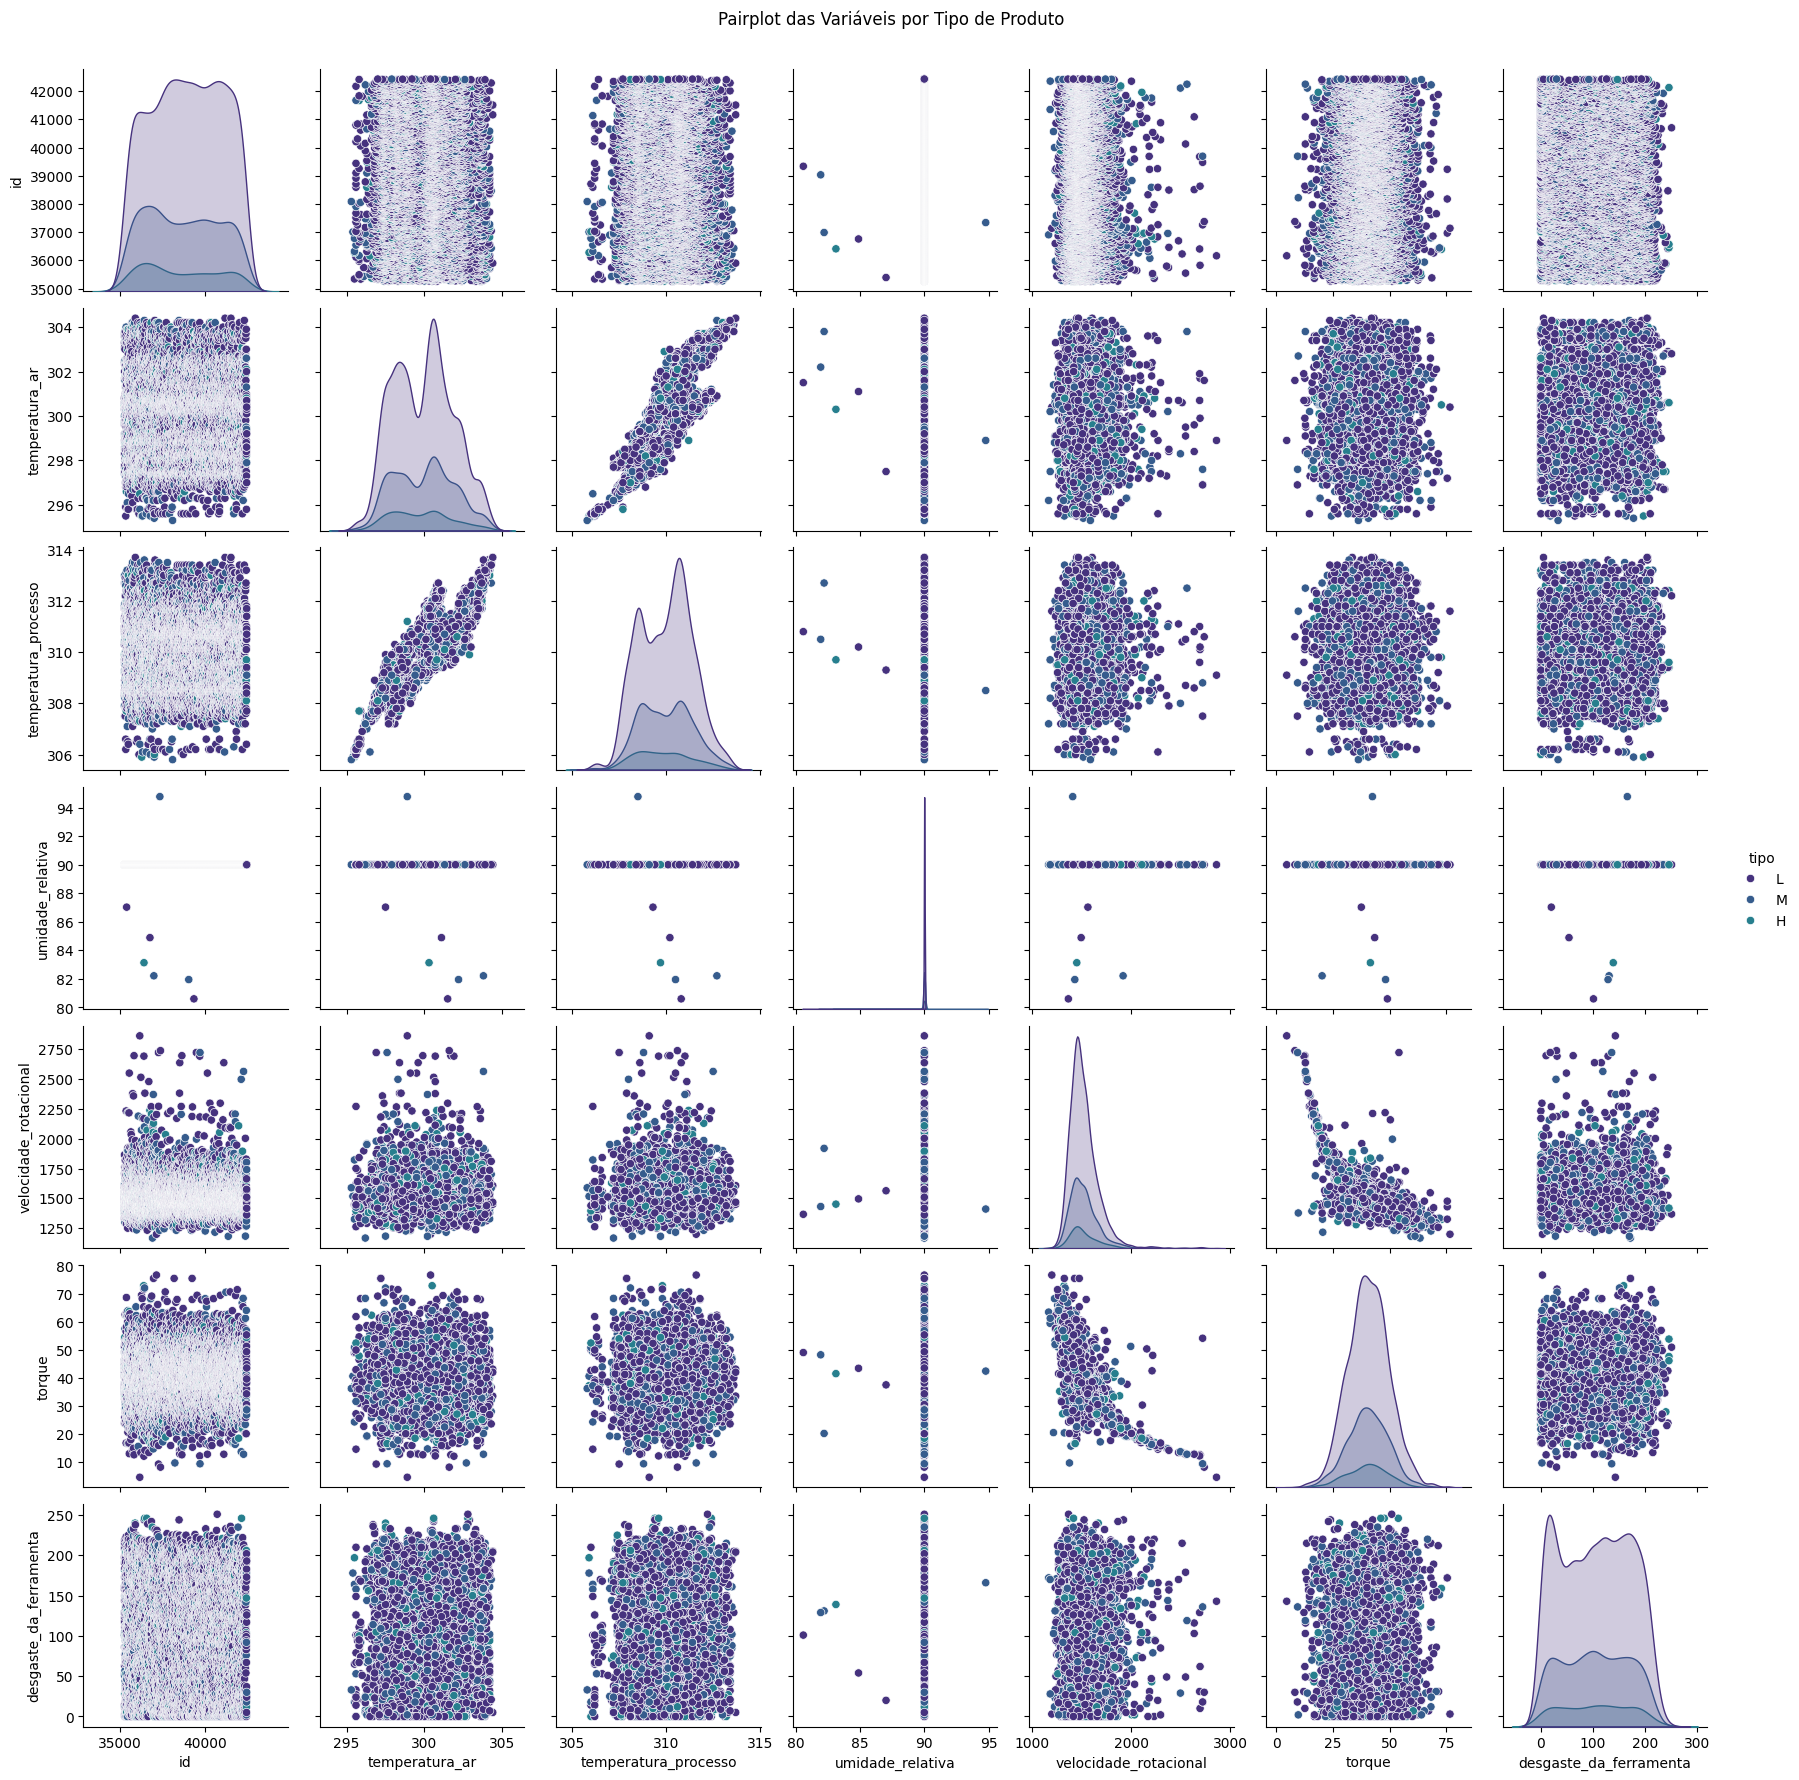

In [3]:
# 1. Distribuição dos tipos de produto
plt.figure(figsize=(10, 6))
sns.countplot(x='tipo', data=df)
plt.title('Distribuição dos Tipos de Produto')
plt.xlabel('Tipo de Produto')
plt.ylabel('Contagem')
plt.show()

# 2. Distribuição das variáveis numéricas
numeric_cols = ['temperatura_ar', 'temperatura_processo', 'umidade_relativa',
                'velocidade_rotacional', 'torque', 'desgaste_da_ferramenta']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# 3. Correlação entre variáveis
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

# 4. Relação entre tipo de produto e variáveis numéricas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x='tipo', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} por Tipo de Produto')
    axes[i].set_xlabel('Tipo de Produto')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

# 5. Pairplot para visualizar relações entre variáveis
sns.pairplot(df, hue='tipo', diag_kind='kde')
plt.suptitle('Pairplot das Variáveis por Tipo de Produto', y=1.02)
plt.show()

In [4]:
# Verificar valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

# Codificar a variável categórica 'tipo'
le = LabelEncoder()
df['tipo_encoded'] = le.fit_transform(df['tipo'])

# Separar features e target
X = df.drop(['id', 'id_produto', 'tipo', 'desgaste_da_ferramenta'], axis=1)
y = df['desgaste_da_ferramenta']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensões: X_train: {X_train.shape}, X_test: {X_test.shape}")

Valores nulos por coluna:
id                        0
id_produto                0
tipo                      0
temperatura_ar            0
temperatura_processo      0
umidade_relativa          0
velocidade_rotacional     0
torque                    0
desgaste_da_ferramenta    0
dtype: int64
Dimensões: X_train: (5738, 6), X_test: (1435, 6)


In [5]:
# Treinar modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# Importância das features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nImportância das features:")
print(feature_importance)

MSE: 4291.92
RMSE: 65.51
R²: -0.0005

Importância das features:
                 feature  importance
4                 torque    0.288221
3  velocidade_rotacional    0.287021
0         temperatura_ar    0.198659
1   temperatura_processo    0.177382
5           tipo_encoded    0.048717
2       umidade_relativa    0.000000


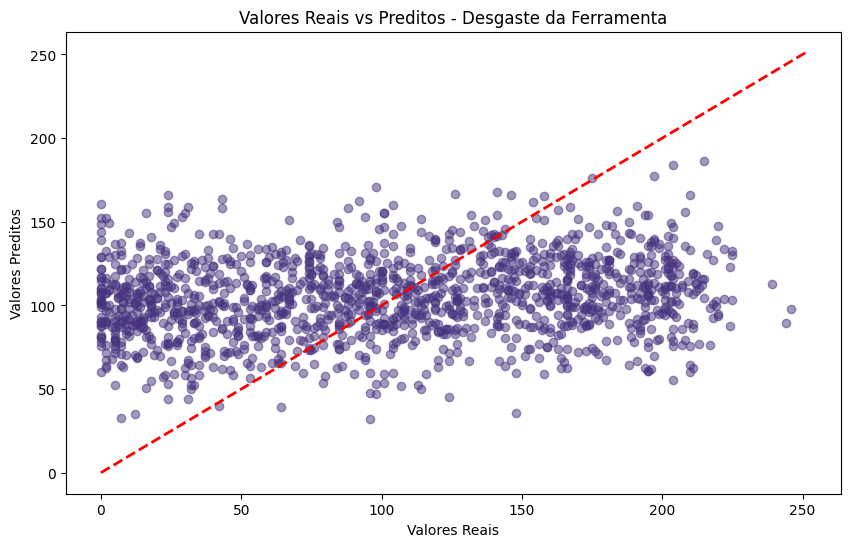

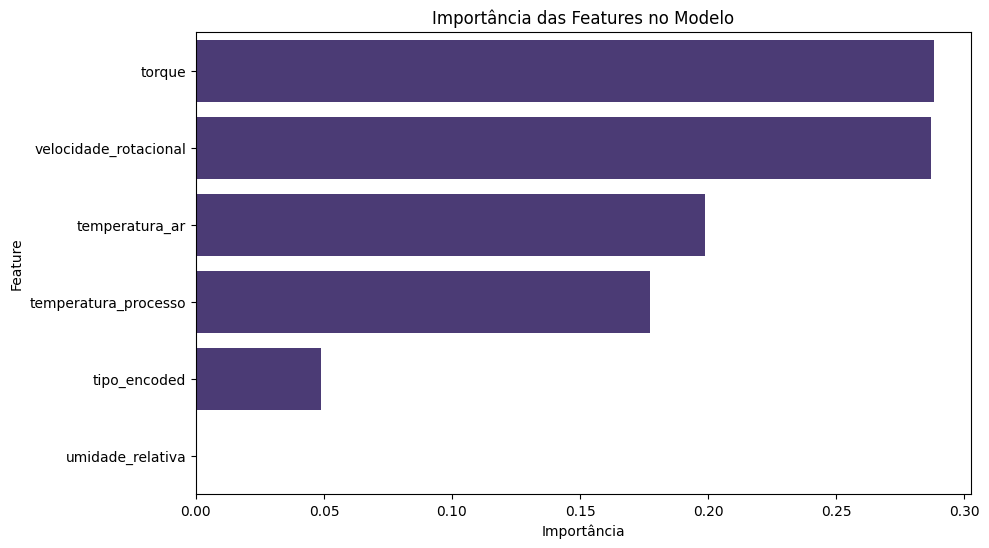

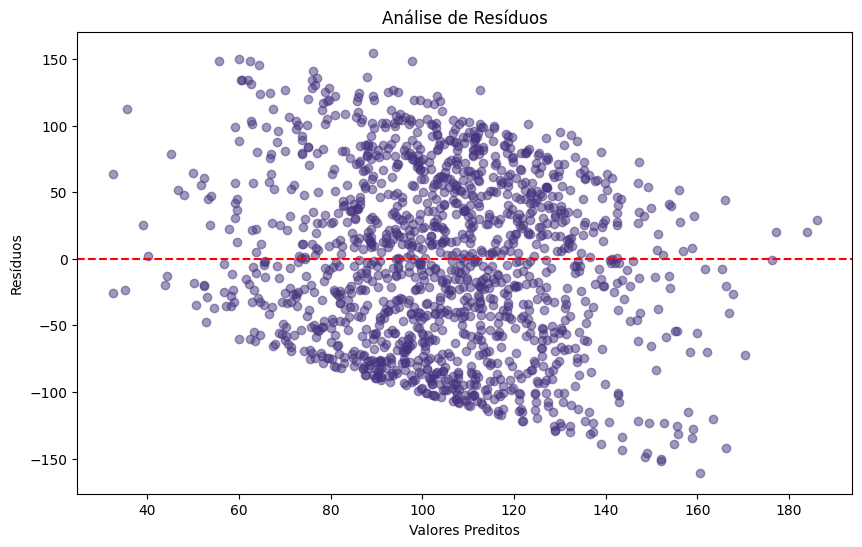

In [6]:
# 1. Valores reais vs previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Preditos - Desgaste da Ferramenta')
plt.show()

# 2. Importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importância das Features no Modelo')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

# 3. Resíduos do modelo
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.show()

Desempenho do modelo por tipo de produto:
  tipo          mse       rmse        r2  count
0    L  4338.136354  65.864530  0.004839    985
1    M  4221.630151  64.974073 -0.012135    337
2    H  4098.737423  64.021383 -0.019758    113


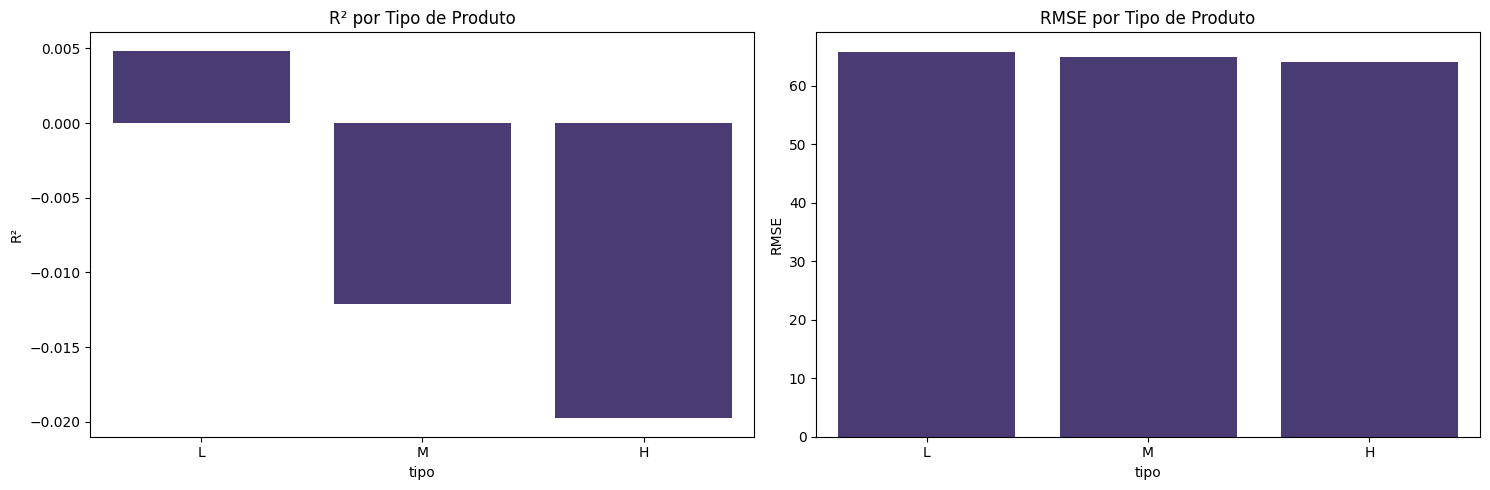

In [7]:
# Analisar desempenho do modelo por tipo de produto
test_indices = X_test.index
df_test = df.loc[test_indices].copy()
df_test['predicted'] = y_pred

# Calcular métricas por tipo de produto
results_by_type = []
for tipo in df_test['tipo'].unique():
    mask = df_test['tipo'] == tipo
    y_true_subset = df_test.loc[mask, 'desgaste_da_ferramenta']
    y_pred_subset = df_test.loc[mask, 'predicted']

    mse_subset = mean_squared_error(y_true_subset, y_pred_subset)
    rmse_subset = np.sqrt(mse_subset)
    r2_subset = r2_score(y_true_subset, y_pred_subset)

    results_by_type.append({
        'tipo': tipo,
        'mse': mse_subset,
        'rmse': rmse_subset,
        'r2': r2_subset,
        'count': mask.sum()
    })

results_df = pd.DataFrame(results_by_type)
print("Desempenho do modelo por tipo de produto:")
print(results_df)

# Visualizar desempenho por tipo
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='tipo', y='r2', data=results_df, ax=axes[0])
axes[0].set_title('R² por Tipo de Produto')
axes[0].set_ylabel('R²')

sns.barplot(x='tipo', y='rmse', data=results_df, ax=axes[1])
axes[1].set_title('RMSE por Tipo de Produto')
axes[1].set_ylabel('RMSE')

plt.tight_layout()
plt.show()

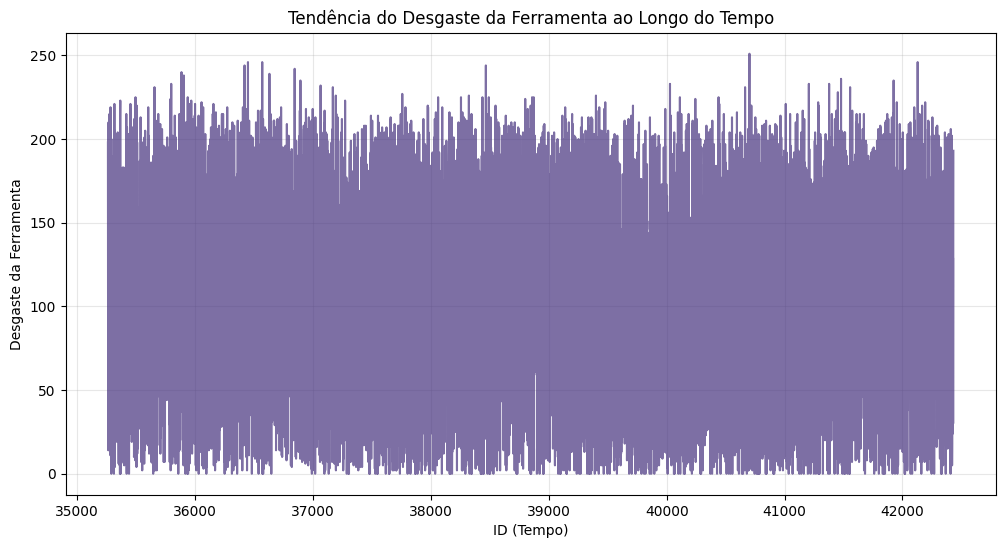

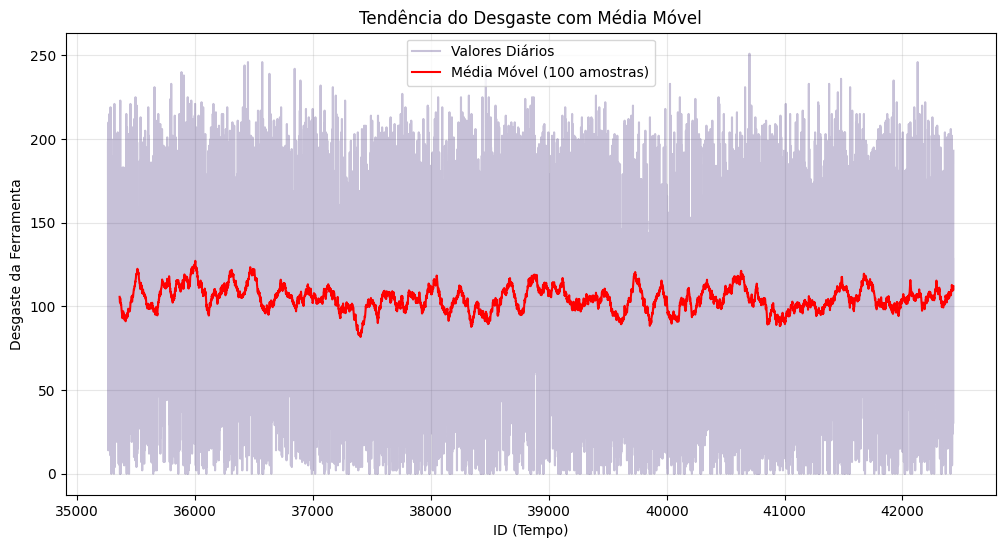

In [8]:
# Ordenar por ID (que parece ser sequencial)
df_sorted = df.sort_values('id')

# Plotar tendência do desgaste ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['id'], df_sorted['desgaste_da_ferramenta'], alpha=0.7)
plt.xlabel('ID (Tempo)')
plt.ylabel('Desgaste da Ferramenta')
plt.title('Tendência do Desgaste da Ferramenta ao Longo do Tempo')
plt.grid(True, alpha=0.3)
plt.show()

# Média móvel do desgaste
window_size = 100
df_sorted['moving_avg'] = df_sorted['desgaste_da_ferramenta'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['id'], df_sorted['desgaste_da_ferramenta'], alpha=0.3, label='Valores Diários')
plt.plot(df_sorted['id'], df_sorted['moving_avg'], 'r-', label=f'Média Móvel ({window_size} amostras)')
plt.xlabel('ID (Tempo)')
plt.ylabel('Desgaste da Ferramenta')
plt.title('Tendência do Desgaste com Média Móvel')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

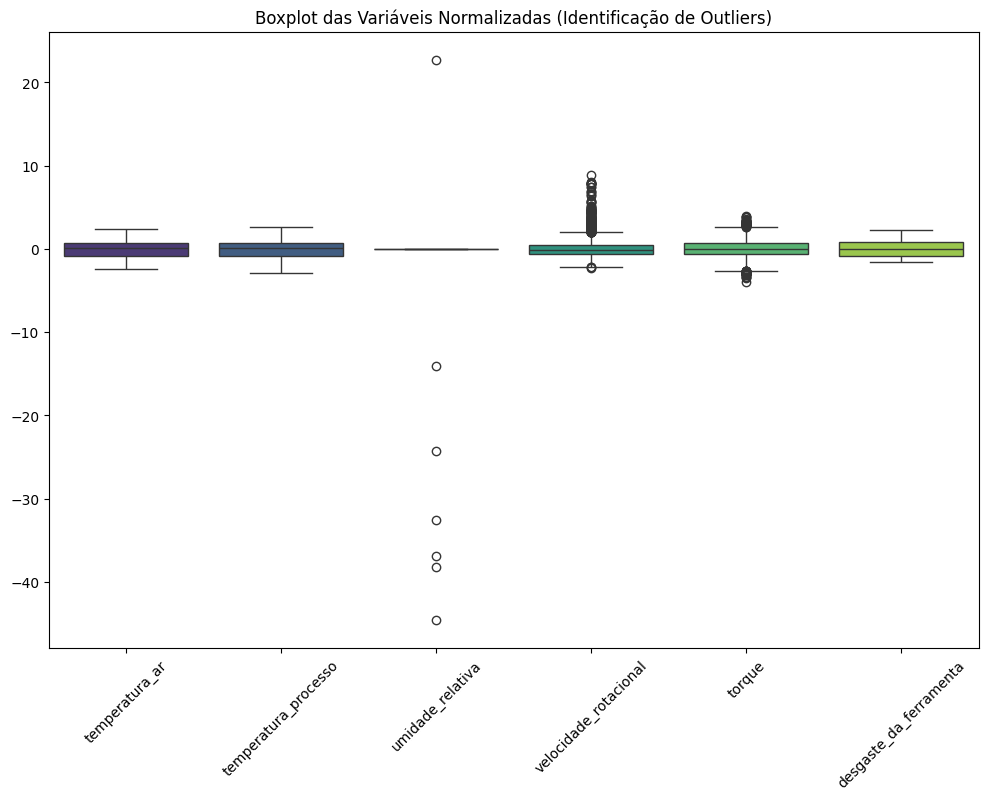

Número de outliers por variável (método IQR):
temperatura_ar: 0 outliers
temperatura_processo: 0 outliers
umidade_relativa: 7 outliers
velocidade_rotacional: 268 outliers
torque: 72 outliers
desgaste_da_ferramenta: 0 outliers


In [9]:
# Identificar outliers usando IQR
plt.figure(figsize=(12, 8))
df_boxplot = df[numeric_cols]
df_boxplot = (df_boxplot - df_boxplot.mean()) / df_boxplot.std()  # Normalizar para melhor visualização

sns.boxplot(data=df_boxplot)
plt.title('Boxplot das Variáveis Normalizadas (Identificação de Outliers)')
plt.xticks(rotation=45)
plt.show()

# Função para identificar outliers
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Encontrar outliers para cada variável numérica
outliers_summary = {}
for col in numeric_cols:
    outliers = find_outliers_iqr(df, col)
    outliers_summary[col] = len(outliers)

print("Número de outliers por variável (método IQR):")
for col, count in outliers_summary.items():
    print(f"{col}: {count} outliers")